**Predicting house prices using machine learning**

**Loading the dataset:**

 The first step is reading the dataset from the csv file we downloaded.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("/content/USA_Housing.csv")

In [ ]:
pd.options.display.float_format = '{:20.2f}'.format
dataset.head(n=5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.92,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386


 let's get statistical information about the numeric columns in our dataset.

In [ ]:
dataset.describe(include=[np.number], percentiles=[.5]).transpose().drop("count", axis=1)


,mean,std,min,50%,max
Avg. Area Income,68583.11,10657.99,17796.63,68804.29,107701.75
Avg. Area House Age,5.98,0.99,2.64,5.97,9.52
Avg. Area Number of Rooms,6.99,1.01,3.24,7.00,10.76
Avg. Area Number of Bedrooms,3.98,1.23,2.00,4.05,6.50
Area Population,36163.52,9925.65,172.61,36199.41,69621.71
Price,1232072.65,353117.63,15938.66,1232669.38,2469065.59


Then, we move to see statistical information about the non-numerical columns in our dataset:

**Data Preprocessing:**

Data cleaning:

**Dealing with Missing Values:**
We should deal with the problem of missing values because some machine learning models don't accept data with missing values. Firstly, let's see the number of missing values in our dataset. We want to see the number and the percentage of missing values for each column that actually contains missing values.

In [ ]:

num_missing = dataset.isna().sum()

num_missing = num_missing[num_missing > 0]

percent_missing = num_missing * 100 / dataset.shape[0]

pd.concat([num_missing, percent_missing], axis=1,
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage


In [ ]:
dataset["Price"].value_counts()

1059033.56    1
1521141.34    1
1148372.40    1
2065710.16    1
1749820.01    1
             ..
1444701.33    1
 788427.84    1
 875904.53    1
 984421.23    1
1298950.48    1
Name: Price, Length: 5000, dtype: int64

In [ ]:
dataset['Price'].fillna('No feature', inplace=True)

 let's check if there is any remaining missing value in our dataset:

In [ ]:
dataset.isna().values.sum()


0

Converting categorical features into numerical representations:

We will encode our categorical features using one-hot encoding technique which transforms the categorical variable into a number of binary variables based on the number of unique categories in the categorical variable.

In [ ]:
dataset[['Address']].head()


,Address
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,USS Barnett\nFPO AP 44820
4,USNS Raymond\nFPO AE 09386


In [ ]:
dataset = pd.get_dummies(dataset)

In [ ]:
address_oneHot = [c for c in dataset.columns if c.startswith("Address")]
dataset[address_oneHot].head()

,"Address_000 Adkins Crescent\nSouth Teresa, AS 49642-1348","Address_000 Todd Pines\nAshleyberg, KY 90207-1179","Address_001 Steve Plaza\nJessicastad, UT 25190","Address_0010 Gregory Loaf\nSouth Ericfort, VA 34651-0718","Address_00149 Raymond Knolls\nNew Jason, UT 75026","Address_002 Katherine Flat\nHartmanland, AZ 37973-3049","Address_0022 Young Rest\nLake Kevin, CA 25438-1821","Address_0029 Melinda Neck Apt. 591\nLake Gregoryshire, HI 60267","Address_003 Erica Passage Apt. 274\nEast Ritaton, KS 97261-8617","Address_003 Fernando Gateway Suite 145\nEast Danielshire, GA 76041",...,Address_Unit 9446 Box 0958\nDPO AE 97025,Address_Unit 9463 Box 0963\nDPO AE 49984-2796,Address_Unit 9494 Box 2307\nDPO AE 58622,Address_Unit 9664 Box 1605\nDPO AA 30902,Address_Unit 9732 Box 1846\nDPO AE 69898-3304,Address_Unit 9774 Box 4511\nDPO AE 44963,Address_Unit 9778 Box 2114\nDPO AP 59374,Address_Unit 9785 Box 0790\nDPO AP 60371-0797,Address_Unit 9831 Box 7128\nDPO AA 54705,Address_Unit 9871 Box 9037\nDPO AP 37275-9289
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Feature Selection**:

Selecting the most relevant features for predicting house prices.

In [ ]:
X = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
Y = dataset['Price']

**Model Building and Evaluation:**

Splitting the data:

 we need a training dataset to train our model and a test dataset to evaluate the model. So we will split our dataset randomly into two parts, one for training and the other for testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [ ]:
Y_train.head()

3413             1305210.26
1610             1400961.28
3459             1048639.79
4293             1231157.25
1039             1391232.53
Name: Price, dtype: float64

In [ ]:
Y_train.shape

(4000,)

Standardizing the data:

To make all algorithms work properly with our data, we need to scale the features in our dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.fit_transform(X_test)

Modeling:

We have used xgboost regression algorithm.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3),  parameter_space, cv=3, n_jobs=4,scoring="neg_mean_absolute_error" ,random_state=3, n_iter=10)
clf.fit(X_train, Y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.6, 'reg_lambda': 10, 'reg_alpha': 10, 'n_estimators': 2500, 'max_depth': 4, 'learning_rate': 0.009, 'gamma': 7, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


we build our XGBoost model with the best parameters found:

In [ ]:
xgb_model = XGBRegressor(**clf.best_params_)

 we train our model using our training set:

In [ ]:
xgb_model.fit(X_train_scal, Y_train);

Predicting Prices:

In [ ]:
y_pred = xgb_model.predict(X_test_scal)
print(y_pred)

[1245976.5   782677.56 1693791.1   965170.56  979755.2   646750.8
 1057040.    830071.8  1431099.9  1197648.1  1397959.1  1316015.9
 1695341.4  1276931.8  1377154.1  1182152.1   576097.4   954917.
 1199935.4  1202382.5   516015.78 1721938.8  1761200.2  1185399.9
 1075547.1  1781688.4  1726844.8  1442473.4  1334613.2  1507267.1
  771825.25 1715043.9  1415200.6   994509.44 1226292.9   898196.56
 1211128.    995412.94 1306071.1   766165.4  1392926.2   710576.3
  816781.25 1829430.1  1610588.    964923.4  1100228.1   834148.5
 1152134.9  1455172.5  1426714.6  1155611.6  1084399.   1355186.5
  811177.06  981478.9  1127577.1  1262368.2  1412904.    553008.
 1401322.1  1119077.1   666898.2  1205247.2  1317447.4  1312847.
  770164.1  1462357.   1378863.1   903097.25  832729.1  1193881.4
 1065133.6  1805220.5   938752.75  815205.75  824481.6  1387455.2
  716566.75 1629987.9  1048518.44 1337776.   1272283.8  1161088.6
  780454.2   653229.56 1037503.75 1359368.6  1030076.   1259515.5
  530128.7  

Evaluation of Predicted Data:

 Then we evaluate the model performance by comparing its predictions with the actual true values in Y_test using the MAE metric :

In [ ]:
from sklearn.metrics import mean_absolute_error
xgb_mae = mean_absolute_error(Y_test, y_pred)
print("XGBoost MAE =", xgb_mae)

XGBoost MAE = 88382.87552199


Evaluation of predicted data using visualisation tool:

Text(0.5, 1.0, 'Actual vs Predicted')

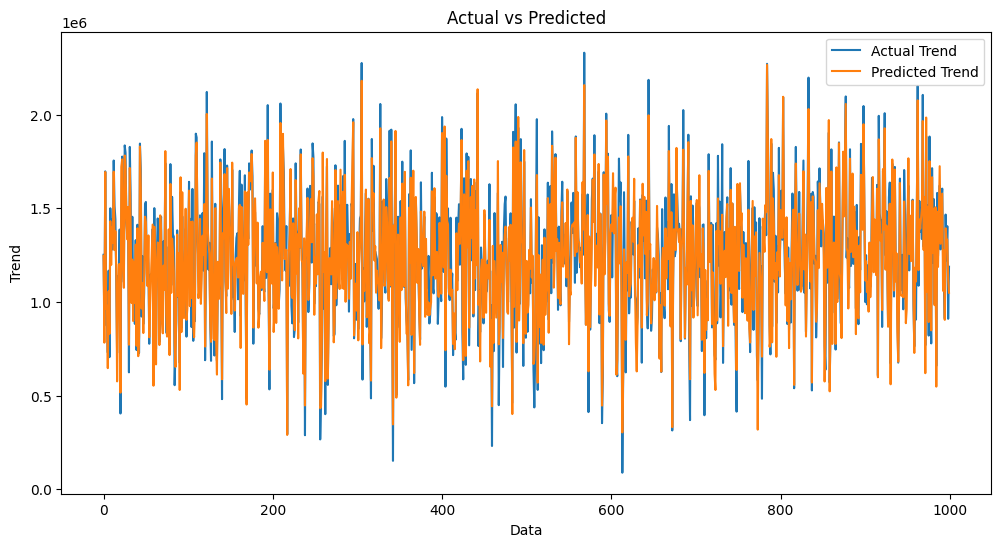

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs Predicted')